<hr>
<h1><b>Coursework 1:</b></h1>
<h3><i>Submitted for the partial fulfilment of the DSM140 course</i></h3>
<h3><i>By Hendrik Matthys van Rooyen</i></h3>
<h3><i>230221176</i></h3>

----

## Introduction

###  Problem area

The area of concern for this text categorization project is that of scientific literature categorization, utilizing the data provided in the arXiv-10 dataset. This dataset, as well as the problem area, is crucial to the rapid and accurate classification of scientific documents. This is particularly important considering the volume of literature produced in a wide variety of fields.(<i>Papers with Code - arXiv-10 Dataset</i>, 2022)

An efficient categorization model can aid in improving the efficiency of the labeling, therefore enhancing accessibility and rate of access to both newly published and archival literature.
The increasing volume and diversity of scientific literature (‘Number of Academic Papers Published Per Year – WordsRated’, 2023) necessitate such advancements in categorization techniques.
As research continues to grow across various scientific domains, the ability to quickly identify and classify documents becomes more critical.

The arXiv-10 dataset, representing a broad spectrum of scientific research, offers an ideal testing ground for developing and refining these categorization models. By efficiently categorizing this dataset, researchers can more easily locate relevant literature, thereby accelerating research and discovery processes.

### Dataset
**Origin and Purpose:**

The dataset has been created by a group of researchers with the goal of facilitating the study and creation of machine learning models. (<i>Papers with Code - arXiv-10 Dataset</i>, 2022)

The dataset is compiled from arXiv repository, which itself is a large collection of academic literature, available open and freely. (<i>Index - arXiv info</i>)

**Size and Scope:**

The dataset contains 100 000 entries, ranging over a wide variety of scientific fields.

**Dataset Structure:**

The arXiv-10 dataset has it's entries equally distributed across 10 classes. The title, abstract, and label is provided as fields.

**Data Types and Features**

Text is the main data type in the dataset, with the label being categorical text. The other "metadata" has been removed in the preparation of the dataset. (<i>Papers with Code - arXiv-10 Dataset</i>, 2022)

**Applications and Utility:**

Ideal for training and evaluating models in text classification, topic modeling, and natural language understanding.

Serves as a benchmark for comparing the performance of various machine learning models, especially in the domain of academic text analysis.

**Challenges and Considerations:**

The level of academic language and the specialized terminology used in the papers may pose challenges for model training and accuracy, but could also serve as a good differentiator in the classification of different groups.

**Access and Availability:**

The arXiv-10 dataset is freely available for download (<i>Papers with Code - arXiv-10 Dataset</i>), with an open source license. And the master arXiv repository is available through the provided arXiv API, as well as on Kaggle (<i>arXiv Dataset</i>) and on other online repositories (<i>Index - arXiv info</i>), with a specified CC0: Public Domain license.

**Ongoing Developments and Updates**

The master arXiv repository is continuously updated with new litterature, while arXiv-10 stays largly stagnant.


### Objectives
The primary objective of this project is to create an effective text classifier tailored for the arXiv-10 dataset.

The project seeks to compare the accuracy of simple classification methods to that of benchmarks provided in research papers.

The following classification algorithms will be implemented from the `sklearn` library for comparison:

- RandomForestClassifier
- SVC
- MultinomialNB
- LogisticRegression
- SVC - linear
- AdaBoostClassifier

As part of the analysis, confusion matrices will be rendered to help with the understanding of where classification problems occur. (<i>Python Machine Learning - Confusion Matrix</i>)

Lastly, the investigation also focuses on how hyperparameter tuning influences the training of a well-performing model.

As previously mentioned, the resulting model could be utilized in the classification of other texts. Therefore, attempts will be made to export the model, so it can hypothetically be utilized at a later stage by interested parties.

### Evaluation methodology

The method uses accuracy as the primary success metric. This involves checking how many times it correctly labels data compared to all the attempts it makes. This metric is chosen specifically due to its application in benchmarks.

The project compares various classification algorithms from the sklearn library. It examines RandomForestClassifier, SVC, MultinomialNB, LogisticRegression, SVC with a linear kernel, and AdaBoostClassifier. The basis of comparison is their accuracy.

These methods' accuracy is the also contrasted with benchmarks established in existing research papers.

To gain a deeper understanding of each classifier, confusion matrices are employed. These matrices are instrumental in discerning not just the general accuracy of the classifier but also the specific errors it commits, such as confusing different classifications.

The effect of hyperparameter tuning on the models' performance is also explored. This involves adjusting the algorithms' parameters to observe their impact on the model's ability to learn from the training data. (<i>Persistence — joblib 1.4.dev0 documentation</i>)

----

## Data Pre-processing
For the pre-processing data, the data is read from the pre-downloaded `arxiv100.csv` dataset into a pandas dataframe

After the `nltk` stopwords and wordnet is downloaded, the re-used functions is defined, these include:
- A function used to clean the text
- A function to get some text statistics
    - Non-Empty Strings Count
    - Average Word Count
    - Most Common Word
    - Average Character Length of Entries
    - Count of Unique Words

It may be worth noting the decision to first define some of the reuseable components of the function to clean the text, as this was done to speed up the runtime of said function.

The data is then cleaned by first cleaning the title and abstract columns individually, and then combining their results.

The cleaning process involves:
- Removing non-letters from the text using regex.
- Lemmatizing the text (‘Python | Lemmatization with NLTK’, 2018)
- Removing stop words from the lemmatized text. (‘Removing stop words with NLTK in Python’, 2017)

Once this has been accomplished, the data is split into testing and training sets using the `sklearn` library's `train_test_split`.

Finally the `CountVectorizer` is used to vectorize the the features (Bag of Words) (‘Using CountVectorizer to Extracting Features from Text’, 2020). The vectorizer is fitted on the training data.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from collections import Counter
import numpy as np

from joblib import dump, load

In [2]:
import pandas as pd

file_path = 'arxiv100.csv'

data = pd.read_csv(file_path)

data.head()

,title,abstract,label
0,The Pre-He White Dwarfs in Eclipsing Binaries....,We report the first $BV$ light curves and hi...,astro-ph
1,A Possible Origin of kHZ QPOs in Low-Mass X-ra...,A possible origin of kHz QPOs in low-mass X-...,astro-ph
2,The effects of driving time scales on heating ...,Context. The relative importance of AC and D...,astro-ph
3,A new hard X-ray selected sample of extreme hi...,Extreme high-energy peaked BL Lac objects (E...,astro-ph
4,The baryon cycle of Seven Dwarfs with superbub...,"We present results from a high-resolution, c...",astro-ph


In [3]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Preload reused components in attempt to speed up the clean_text function.
regex = re.compile("[^a-zA-Z]")
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text data
def clean_text(text):
    # Remove non-letter characters and lower case all words
    text = regex.sub(" ", text).lower()

    # Remove stop words and lemmatize the words
    meaningful_words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stops]

    return " ".join(meaningful_words)

def text_column_stats(df, column_name):
    if column_name not in df.columns:
        return

    # Filtering out empty or NaN entries
    valid_texts = df[column_name].dropna().astype(str)

    # Function to calculate average word count
    def avg_word_count(texts):
        word_counts = texts.apply(lambda x: len(x.split()))
        return np.mean(word_counts)

    # Function to find the most common word
    def most_common_word(texts):
        words = ' '.join(texts).split()
        most_common = Counter(words).most_common(1)
        return most_common[0][0] if most_common else 'No words'

    stats = {
        'Non-Empty Strings Count': valid_texts.count(),
        'Average Word Count': avg_word_count(valid_texts),
        'Most Common Word': most_common_word(valid_texts),
        'Average Character Length of Entries': valid_texts.apply(len).mean(),
        'Count of Unique Words': len(set(' '.join(valid_texts).split()))
    }

    return stats

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mvanr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
text_column_stats(data, 'title')

{'Non-Empty Strings Count': 100000,
 'Average Word Count': 9.96153,
 'Most Common Word': 'of',
 'Average Character Length of Entries': 77.21297,
 'Count of Unique Words': 95785}

In [5]:
text_column_stats(data, 'abstract')

{'Non-Empty Strings Count': 100000,
 'Average Word Count': 154.75792,
 'Most Common Word': 'the',
 'Average Character Length of Entries': 1057.10563,
 'Count of Unique Words': 505570}

In [6]:
# Clean the dataset
data['cleaned_title'] = data['title'].apply(clean_text)
data['cleaned_abstract'] = data['abstract'].apply(clean_text)

# Combine title and abstract for text representation
data['combined_text'] = data['cleaned_title'] + " " + data['cleaned_abstract']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['combined_text'], data['label'], test_size=0.2, random_state=42)

In [7]:
text_column_stats(data, 'combined_text')

{'Non-Empty Strings Count': 100000,
 'Average Word Count': 107.29445,
 'Most Common Word': 'model',
 'Average Character Length of Entries': 844.74635,
 'Count of Unique Words': 95658}

In [7]:
data['combined_text']

0        pre white dwarf eclipsing binary wasp report f...
1        possible origin khz qpos low mass x ray binary...
2        effect driving time scale heating coronal arca...
3        new hard x ray selected sample extreme high en...
4        baryon cycle seven dwarf superbubble feedback ...
                               ...                        
99995    semiparametric estimation space time max stabl...
99996    spatial causal analysis wildland fire contribu...
99997    neural conditional event time model event time...
99998    efficient estimation com poisson regression ge...
99999    algcomparison comparing performance graphical ...
Name: combined_text, Length: 100000, dtype: object

In [6]:
# Vectorization using Bag of Words model
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

X_train_features.shape, X_test_features.shape

((80000, 5000), (20000, 5000))

## Baseline

The baseline models as described on <i>Papers with Code - arXiv-10 Dataset</i> makes use of different models (see table below), with accuracies ranging between 0.746 and 0.794 with the most recent being achieved in 2023.

These benchmark models are however different form those implemented in this project, as they make use of more advanced machine learning techniques, such as Transformers and Hierarchical Attention Networks (HAN), while the models in this project focuses on simpler methods.

These benchmarks were chosen, as they have been achieved on the same data, as maintained on <i>Papers with Code - arXiv-10 Dataset</i>, the Protoformer result is also dated fairly recent, which provides an up to date goal.

| Model | Accuracy | Paper | Year |
|---|---|---|---|
| Protoformer | 0.794 | Protoformer: Embedding Prototypes for Transformers | 2023 |
| RoBERTa | 0.779 | RoBERTa: A Robustly Optimized BERT Pretraining Approach | 2019 |
| DocBERT | 0.764 | DocBERT: BERT for Document Classification | 2019 |
| HAN | 0.746 | Hierarchical Attention Networks for Document Classification | 2019 |

----

##  Classification

Starting the classification process, a function is created that will be utilized at the end of each model's training to both produce the accuracy statistic, as well as display the confusion matrix for further consideration.

As discussed before, the following models is then trained from the `sklearn` library:
- RandomForestClassifier
- SVC
- MultinomialNB
- LogisticRegression
- SVC - linear
- AdaBoostClassifier

After consideration of each of the models' accuracy statistic, as well as the speed at which the model trains, a model is chosen on which the hyper parameter tuning is performed.

Throughout the training process some of the well preforming models is stored for future use.

In [ ]:
# Function to print the results
def print_results(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)

    print("Accuracy:", accuracy)
    unique_labels = y_test.unique()
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_labels)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

### RandomForestClassifier
With the random forest model being the first to be trained it was quite surprizing that the simple model outperformed the earlier benchmarks set by `RoBERTa` (0.779), `DocBERT`, and `HAN`, comming close to the benchmark (0.794) set by `Protoformer` in 2023 as well.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train_features, y_train)

Accuracy: 0.78955


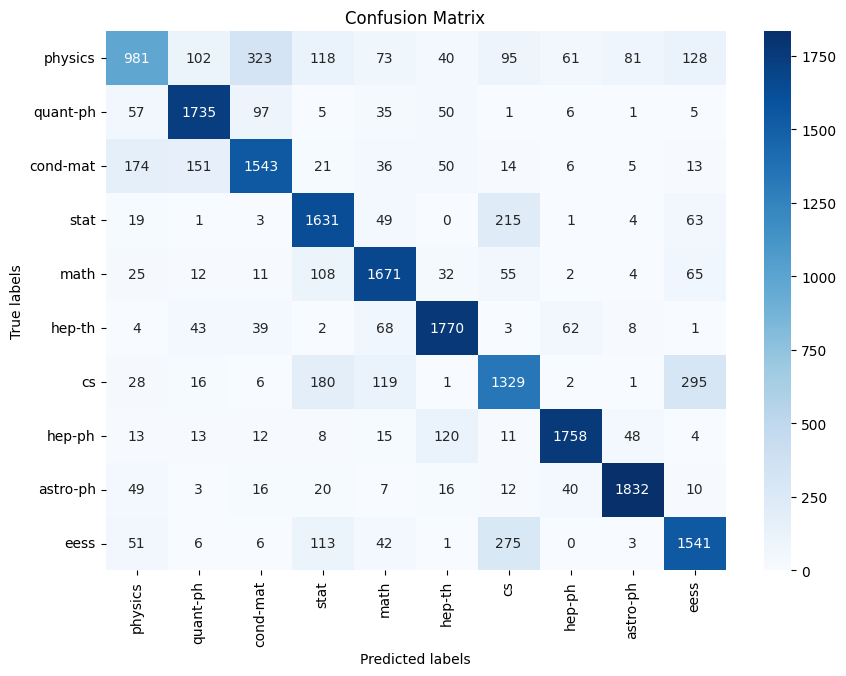

In [19]:
# Evaluate the model
rf_predictions = rf_model.predict(X_test_features)

print_results(y_test, rf_predictions)

### SVC - rbf

The SVC model took considerably longer to train, with over 35 minutes, and the rate of prediction was also underwhelming with, taking much longer as well.

The results however does indicate some justification, beating the `Protoformer` benchmark, as well as the earlier Random Forest Classifier

In [7]:
from sklearn.svm import SVC

# Instantiate the model
svm_model = SVC()

In [8]:
# Train the model
svm_model.fit(X_train_features, y_train)

SVC()

In [9]:
# Evaluate the model
svm_predictions = svm_model.predict(X_test_features)

Accuracy: 0.8381


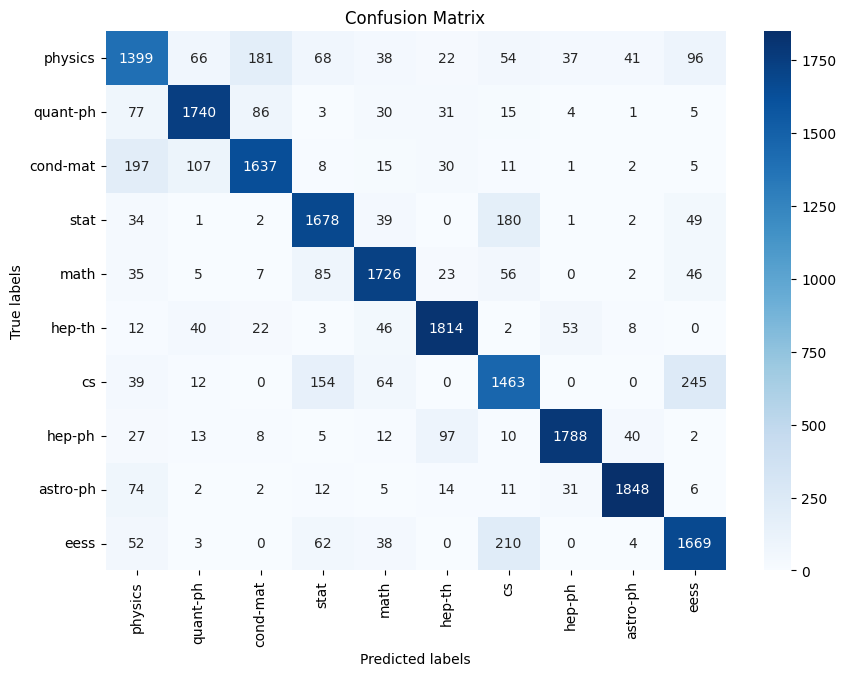

In [10]:
print_results(y_test, svm_predictions)

In [12]:
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

### MultinomialNB
The multinomial Naive Bayes classifier, while performing at a lower accuracy that that of the SVC, trained and tested nearly instantly, while still beating the benchmark.

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model
nb_model = MultinomialNB()

In [10]:
# Train the model
nb_model.fit(X_train_features, y_train)

MultinomialNB()

In [11]:
# Evaluate the model
nb_predictions = nb_model.predict(X_test_features)

Accuracy: 0.81035


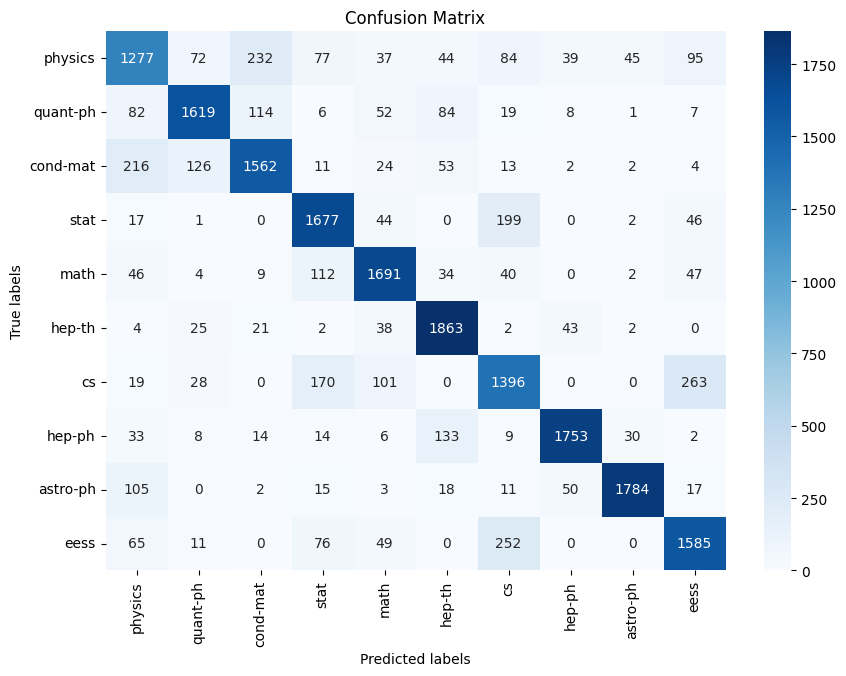

In [12]:
print_results(y_test, nb_predictions)

An interesting feature of the MultinomialNB classifier is that the features can be retrieved to display a summary of which labels they map to.

In [18]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
for i, class_label in enumerate(nb_model.classes_):
    top10 = np.argsort(nb_model.feature_log_prob_[i])[-10:]
    print(f"{class_label}: {', '.join(feature_names[top10])}")

astro-ph: high, field, time, ray, observation, data, model, mass, galaxy, star
cond-mat: two, temperature, quantum, field, model, magnetic, system, phase, spin, state
cs: approach, system, problem, algorithm, based, method, data, learning, network, model
eess: learning, using, data, proposed, image, method, network, based, model, system
hep-ph: state, higgs, energy, quark, decay, matter, dark, neutrino, mass, model
hep-th: function, space, symmetry, gauge, two, non, quantum, model, field, theory
math: method, paper, mathbb, equation, group, show, function, problem, space, result
physics: two, high, based, energy, method, using, system, time, field, model
quant-ph: entanglement, photon, classical, measurement, show, time, two, system, state, quantum
stat: time, distribution, study, using, algorithm, based, approach, method, data, model


### LogisticRegression

Although in line with the benchmark models, the LogisticRegression model fails to outperform the the SVC or the MultinomialNB classifiers.

In [31]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr_model = LogisticRegression(max_iter=1000)

In [33]:
# Train the model
lr_model.fit(X_train_features, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Evaluate the model
lr_predictions = lr_model.predict(X_test_features)

Accuracy: 0.7891


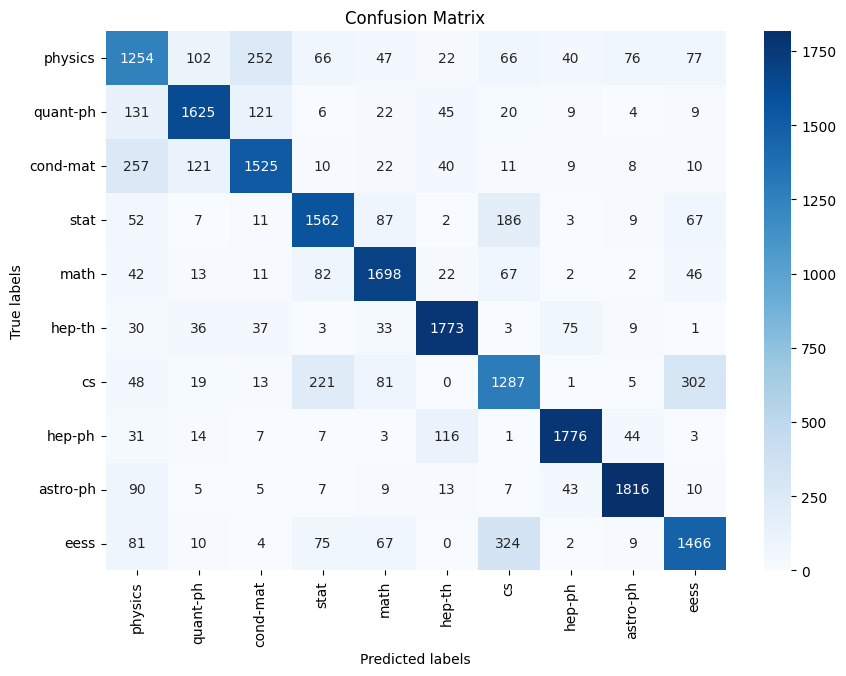

In [35]:
print_results(y_test, lr_predictions)

### SVC - linear
As the rbf SVC model preformed well, the linear model has also been attempted, although also quite time consuming to evaluate the impact of hyper parameter tuning, but the accuracy fell compared to the initial model, and it was therefor decided to investigate the MultinomialNB further, as it had a much more viable training and testing time, for experimentation.

In [46]:
from sklearn.svm import SVC

# Instantiate the model with RBF Kernel
svm_linear_model = SVC(kernel='linear')

In [47]:
# Train the model
svm_linear_model.fit(X_train_features, y_train)

SVC(kernel='linear')

In [48]:
# Evaluate the model
svm_linear_predictions = svm_linear_model.predict(X_test_features)

Accuracy: 0.7815


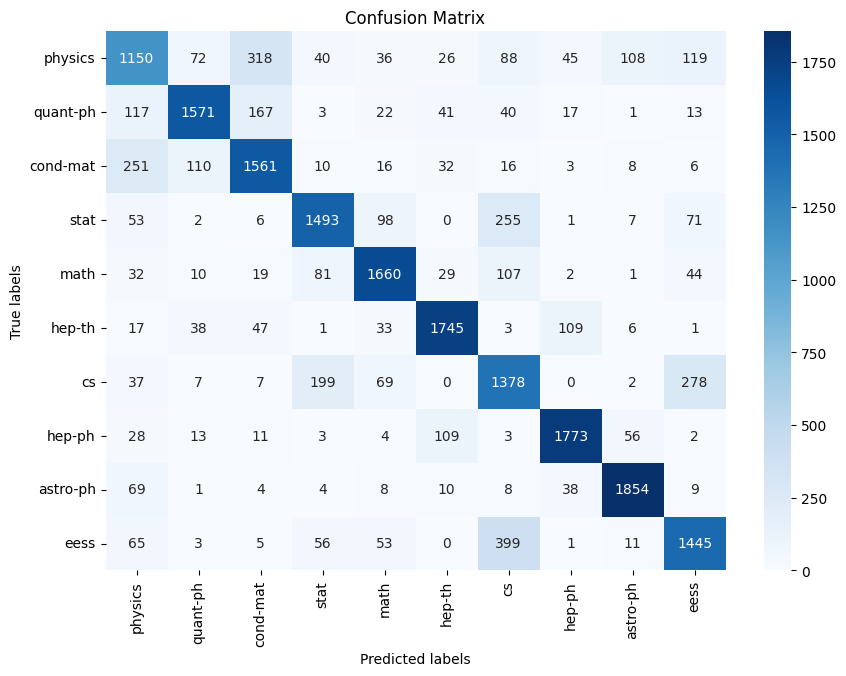

In [49]:
print_results(y_test, svm_linear_predictions)

### AdaBoostClassifier
AdaBoost also seemed to have some success in text classification and was therefor implemented, however performed the worst of the models, with an accuracy of 0.612, and falling short of all benchmarks.



In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
# Using a Decision Tree as the base estimator
ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

In [38]:
# Train the model
ada_boost_model.fit(X_train_features, y_train)

c:\Projects\UoL\(DSM140-2023-OCT) Natural language processing\CW1\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

In [39]:
# Evaluate the model
ada_boost_predictions = ada_boost_model.predict(X_test_features)

Accuracy: 0.6117


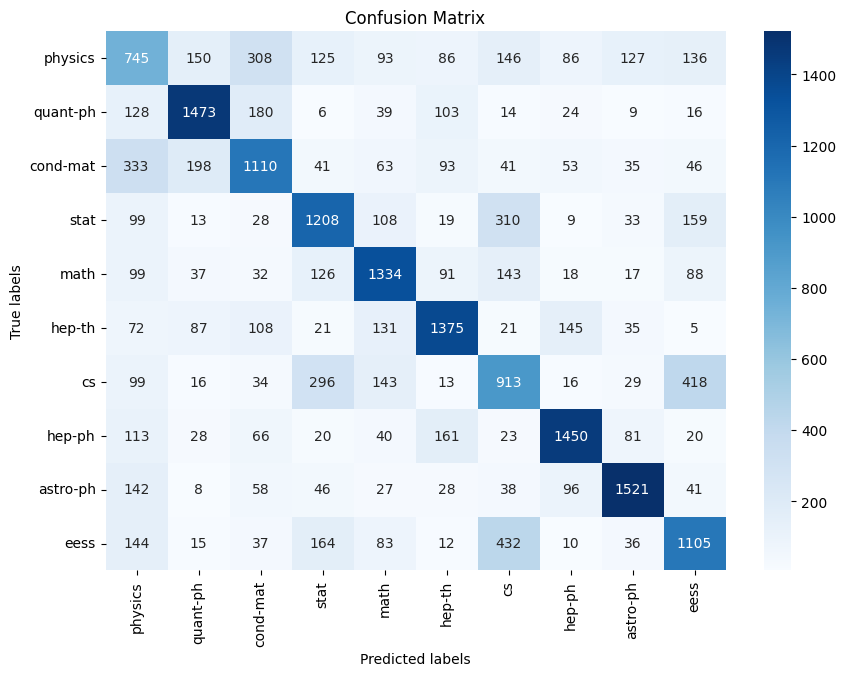

In [41]:
print_results(y_test, ada_boost_predictions)

### MultinomialNB - Expanded

For the first experiment, the vectorizer was changed from the CountVectorizer to the TfidfVectorizer. This resulted in a slight increase in accuracy from 0.81035 to 0.81135

It was then attempted to evaluate the effect of changing the maximum number of features in the vectorizer on the accuracy of the model, as well as the effect of the ngram_range. This resulted in a further increase to 0.81605 with a higer amount of features, however ngram_range significantly impacted the training time of the vectorizer. 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

Accuracy: 0.81135


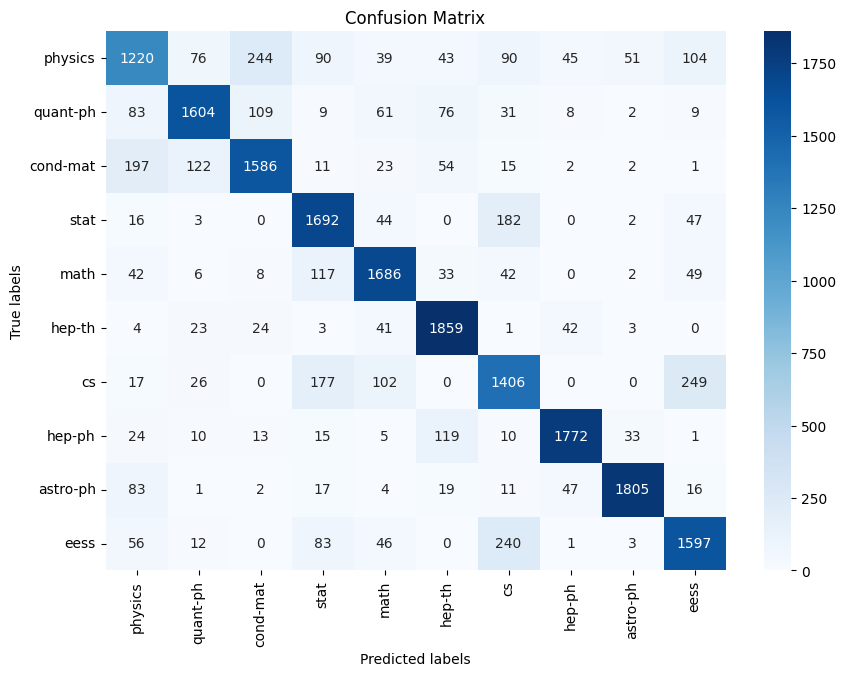

Accuracy: 0.79735


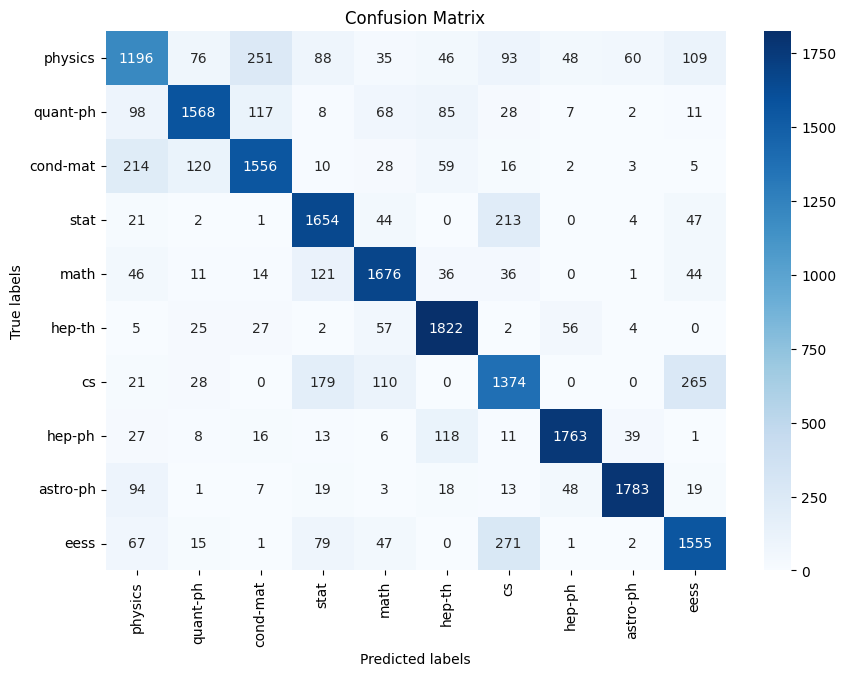

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2500)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can use X_train_tfidf and X_test_tfidf for your model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

Accuracy: 0.81605


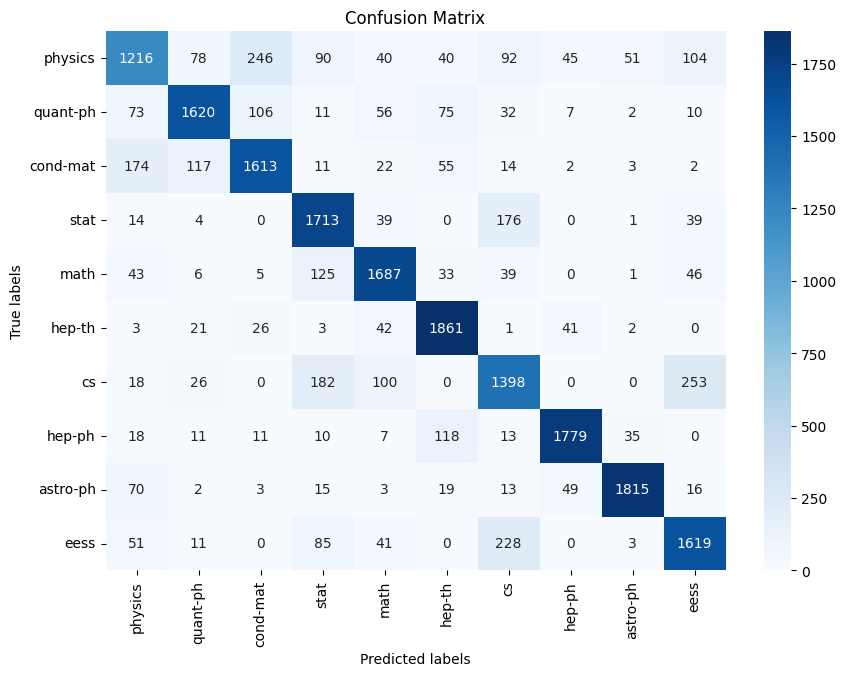

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=7500)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can use X_train_tfidf and X_test_tfidf for your model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

Accuracy: 0.7694


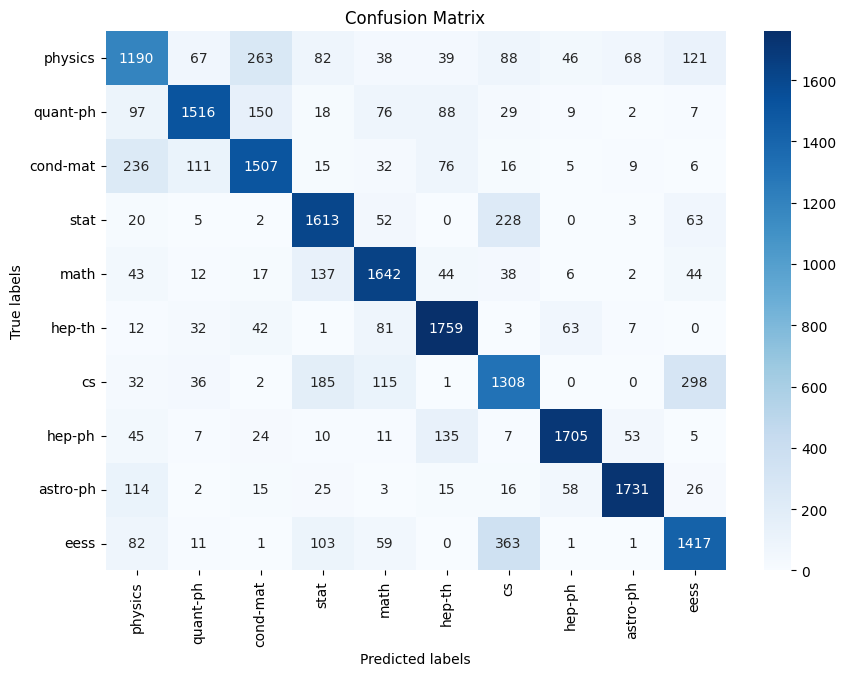

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can use X_train_tfidf and X_test_tfidf for your model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

Accuracy: 0.8132


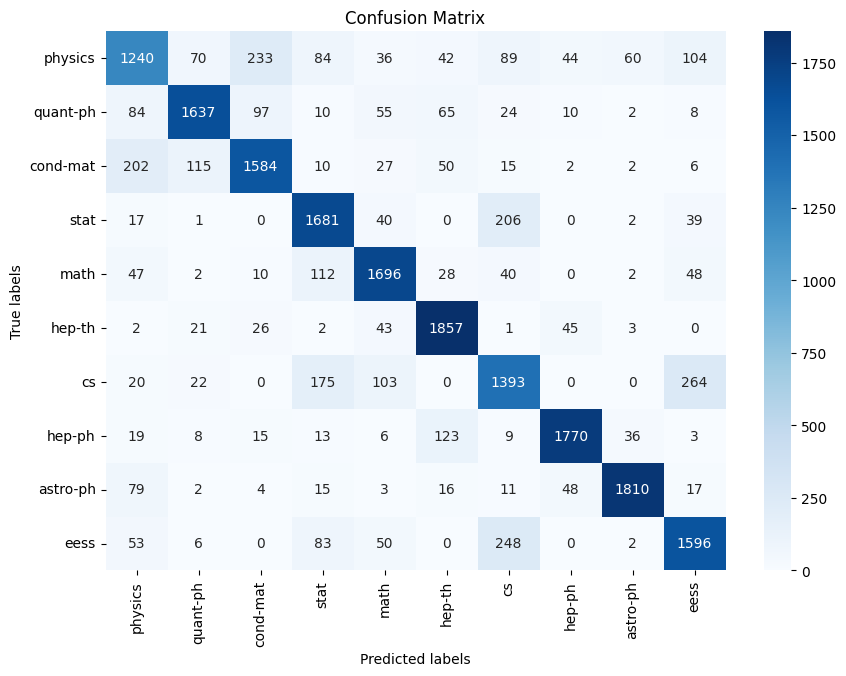

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range= (1,2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can use X_train_tfidf and X_test_tfidf for your model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

Accuracy: 0.81335


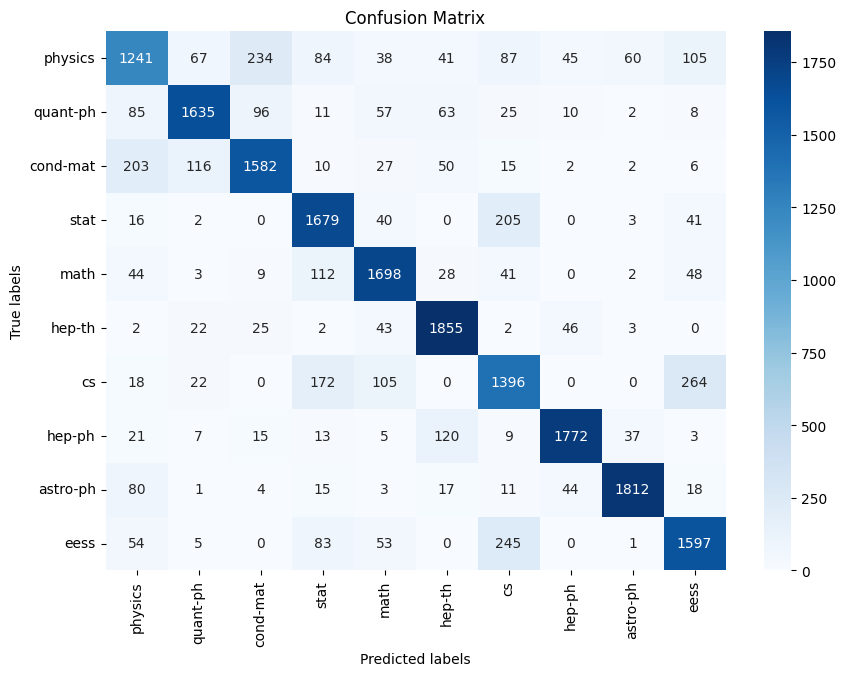

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range= (1,3))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can use X_train_tfidf and X_test_tfidf for your model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
print_results(y_test, nb_predictions)

### Findings Summary

**Benchmarks**

| Model | Accuracy |
|---|---|
| Protoformer | 0.794 |
| RoBERTa | 0.779 |
| DocBERT | 0.764 |
| HAN | 0.746 |


**Findings**

| Model | Accuracy |
|---|---|
| RandomForestClassifier | 0.790 |
| **SVC - rbf** | **0.838** |
| MultinomialNB | 0.810 |
| SVC - linear | 0.782 |
| AdaBoostClassifier | 0.612 |

**Experiments**

| Model | Vectorizer | max_features | ngram_range | Accuracy |
|---|---|---|---|---|
| MultinomialNB | CountVectorizer | 5000 | (1,1) | 0.81035 |
| MultinomialNB | TfidfVectorizer | 5000 | (1,1) | 0.81135 |
| MultinomialNB | TfidfVectorizer | 2500 | (1,1) | 0.79735 |
| MultinomialNB | TfidfVectorizer | 7500 | (1,1) | **0.81605** |
| MultinomialNB | TfidfVectorizer | 1000 | (1,1) | 0.7694 |
| MultinomialNB | TfidfVectorizer | 5000 | (1,2) | 0.8132 |
| MultinomialNB | TfidfVectorizer | 5000 | (1,3) | 0.81335 |

----

## Outcome

### Evaluation

From the summary above, as well as the comments throughout the Classification process, it is shown that the Support Vector Classification as well as the Multinomial Naive Bayes has successfully outperformed the benchmarks set by previous research papers.

While both the successful models can be considered improvements over the benchmarks, the Multinomial Naive Bayes being much faster to train (2 seconds compared to 35 minutes) may make it more feasible to implement in a production environment, and made it easier to experiment with further.

By adjusting and tuning the vectorizer, the accuracy was improved by a bit, but not significantly. With the largest increase seen when increasing the `max_features`.

**Confusion Matrices:**

An interesting consideration when evaluating the confusion matrices is that the `physics` and `cs` labels are least correctly identified, with `physics` frequently identified as `cond-math`, and `cs` being identified as `stat` and `eess`.

Referring back to the mapping of the features form the MultinomialNB classifier we can see the feature "two" being shared between the first pair, both as their most important feature. The other three having a multiple combinations of shared terms.

First group:

- physics: **two**, high, based, energy, method, using, system, time, **field**, model
- cond-mat: **two**, temperature, quantum, **field**, model, magnetic, system, phase, spin, state

Second group:

- cs: **approach**, system, problem, **algorithm**, based, method, **data**, **learning**, network, model
- stat: time, distribution, study, using, **algorithm**, based, **approach**, method, **data**, model
- eess: **learning**, using, **data**, proposed, image, method, network, based, model, system

This finding indicates that there may be a possible further performance increase to be had by adding words such as "two", "approach", and "method" as stopwords in the preprocessing of the data.

### Summary and conclusions

The project focused on developing effective text classification models tailored for the arXiv-10 dataset, a collection of academic literature. It aimed to compare the accuracy of simpler classification methods against benchmarks from research papers. The study utilized various classification algorithms from the sklearn library, including RandomForestClassifier, SVC, MultinomialNB, LogisticRegression, AdaBoostClassifier, and an SVC with a linear kernel. Accuracy was the primary metric for evaluation, supplemented by confusion matrices for a deeper understanding of each classifier's performance.

#### Reflective Evaluation

**Contributions to Text Categorization:** The project made some contributions by demonstrating that simpler models can achieve, and in some cases, surpass benchmark accuracies set by more complex algorithms. This was evident in the performance of the MultinomialNB and the SVC models.

**Transferability to Other Domains:** The approach adopted in this project, primarily the use of simpler, more interpretable models, holds potential for application in other domain-specific areas where complex models might not be feasible or necessary. Its success with a diverse dataset like arXiv-10 suggests adaptability across various domains.

#### Replicability

**Using Different Tools:** The methodology employed is replicable using different programming languages, development environments, and libraries. The fundamental principles of text preprocessing, feature extraction, and model evaluation are not exclusive to Python or sklearn, making the approach adaptable.

**Alternatives in Algorithms and Libraries:** While sklearn provided a simple platform for this study, other machine learning libraries like TensorFlow or PyTorch could offer different algorithms and techniques, potentially providing different results.

#### Alternative Approaches

**Benefits:** Using more advanced techniques, such as deep learning models, might provide higher accuracy and better handle complex features in the data.

**Drawbacks:** These advanced models often require more computational resources and time for training and tuning. They also tend to be less interpretable, which can be a significant drawback in academic settings where understanding model decisions is crucial.

In conclusion, the project effectively demonstrated the viability of simpler models in text categorization, offering insights into their potential application in other domains. While more complex models might offer slight improvements in accuracy, the trade-offs in terms of resources and interpretability must be carefully considered.

---

## References

<div class="csl-bib-body" style="line-height: 1.35; ">
  <div class="csl-entry" style="margin-bottom: 1em;"><i>arXiv Dataset</i> (2023). Available at: <a href="https://www.kaggle.com/datasets/Cornell-University/arxiv">https://www.kaggle.com/datasets/Cornell-University/arxiv</a> (Accessed: November 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=arXiv%20Dataset&amp;rft.description=arXiv%20dataset%20and%20metadata%20of%201.7M%2B%20scholarly%20papers%20across%20STEM&amp;rft.identifier=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2FCornell-University%2Farxiv&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Index - arXiv info</i> (no date). Available at: <a href="https://info.arxiv.org/help/bulk_data/index.html">https://info.arxiv.org/help/bulk_data/index.html</a> (Accessed: November 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Index%20-%20arXiv%20info&amp;rft.identifier=https%3A%2F%2Finfo.arxiv.org%2Fhelp%2Fbulk_data%2Findex.html"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">‘Number of Academic Papers Published Per Year – WordsRated’ (2023), 1 June. Available at: <a href="https://wordsrated.com/number-of-academic-papers-published-per-year/">https://wordsrated.com/number-of-academic-papers-published-per-year/</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Number%20of%20Academic%20Papers%20Published%20Per%20Year%20%E2%80%93%20WordsRated&amp;rft.identifier=https%3A%2F%2Fwordsrated.com%2Fnumber-of-academic-papers-published-per-year%2F&amp;rft.date=2023-06-01&amp;rft.language=en-US"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Papers with Code - arXiv-10 Dataset</i> (2022). Available at: <a href="https://paperswithcode.com/dataset/arxiv-10">https://paperswithcode.com/dataset/arxiv-10</a> (Accessed: November 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Papers%20with%20Code%20-%20arXiv-10%20Dataset&amp;rft.description=Benchmark%20dataset%20for%20abstracts%20and%20titles%20of%20100%2C000%20ArXiv%20scientific%20papers.%0AThis%20dataset%20contains%2010%20classes%20and%20is%20balanced%20(exactly%2010%2C000%20per%20class).%0AThe%20classes%20include%20subcategories%20of%20computer%20science%2C%20physics%2C%20and%20math.%20%0A%0A%E2%80%A2%20Direct%20link%3A%20Download%0A%0A%E2%80%A2%20Citation%3A%0A%40inproceedings%7Bfarhangi2022protoformer%2C%0A%20%20title%3D%7BProtoformer%3A%20Embedding%20Prototypes%20for%20Transformers%7D%2C%0A%20%20author%3D%7BFarhangi%2C%20Ashkan%20and%20Sui%2C%20Ning%20and%20Hua%2C%20Nan%20and%20Bai%2C%20Haiyan%20and%20Huang%2C%20Arthur%20and%20Guo%2C%20Zhishan%7D%2C%0A%20%20booktitle%3D%7BAdvances%20in%20Knowledge%20Discovery%20and%20Data%20Mining%3A%2026th%20Pacific-Asia%20Conference%2C%20PAKDD%202022%2C%20Chengdu%2C%20China%2C%20May%2016--19%2C%202022%2C%20Proceedings%2C%20Part%20I%7D%2C%0A%20%20pages%3D%7B447--458%7D%2C%0A%20%20year%3D%7B2022%7D%0A%7D&amp;rft.identifier=https%3A%2F%2Fpaperswithcode.com%2Fdataset%2Farxiv-10&amp;rft.date=2022&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Persistence — joblib 1.4.dev0 documentation</i> (no date). Available at: <a href="https://joblib.readthedocs.io/en/latest/persistence.html">https://joblib.readthedocs.io/en/latest/persistence.html</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Persistence%20%E2%80%94%20joblib%201.4.dev0%20documentation&amp;rft.identifier=https%3A%2F%2Fjoblib.readthedocs.io%2Fen%2Flatest%2Fpersistence.html"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">‘Python | Lemmatization with NLTK’ (2018) <i>GeeksforGeeks</i>, 6 November. Available at: <a href="https://www.geeksforgeeks.org/python-lemmatization-with-nltk/">https://www.geeksforgeeks.org/python-lemmatization-with-nltk/</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Python%20%7C%20Lemmatization%20with%20NLTK&amp;rft.description=A%20Computer%20Science%20portal%20for%20geeks.%20It%20contains%20well%20written%2C%20well%20thought%20and%20well%20explained%20computer%20science%20and%20programming%20articles%2C%20quizzes%20and%20practice%2Fcompetitive%20programming%2Fcompany%20interview%20Questions.&amp;rft.identifier=https%3A%2F%2Fwww.geeksforgeeks.org%2Fpython-lemmatization-with-nltk%2F&amp;rft.date=2018-11-06&amp;rft.language=en-US"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Python Machine Learning - Confusion Matrix</i> (no date). Available at: <a href="https://www.w3schools.com/python/python_ml_confusion_matrix.asp">https://www.w3schools.com/python/python_ml_confusion_matrix.asp</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Python%20Machine%20Learning%20-%20Confusion%20Matrix&amp;rft.description=W3Schools%20offers%20free%20online%20tutorials%2C%20references%20and%20exercises%20in%20all%20the%20major%20languages%20of%20the%20web.%20Covering%20popular%20subjects%20like%20HTML%2C%20CSS%2C%20JavaScript%2C%20Python%2C%20SQL%2C%20Java%2C%20and%20many%2C%20many%20more.&amp;rft.identifier=https%3A%2F%2Fwww.w3schools.com%2Fpython%2Fpython_ml_confusion_matrix.asp&amp;rft.language=en-US"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">‘Removing stop words with NLTK in Python’ (2017) <i>GeeksforGeeks</i>, 22 May. Available at: <a href="https://www.geeksforgeeks.org/removing-stop-words-nltk-python/">https://www.geeksforgeeks.org/removing-stop-words-nltk-python/</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Removing%20stop%20words%20with%20NLTK%20in%20Python&amp;rft.description=A%20Computer%20Science%20portal%20for%20geeks.%20It%20contains%20well%20written%2C%20well%20thought%20and%20well%20explained%20computer%20science%20and%20programming%20articles%2C%20quizzes%20and%20practice%2Fcompetitive%20programming%2Fcompany%20interview%20Questions.&amp;rft.identifier=https%3A%2F%2Fwww.geeksforgeeks.org%2Fremoving-stop-words-nltk-python%2F&amp;rft.date=2017-05-22&amp;rft.language=en-US"></span>
  <div class="csl-entry">‘Using CountVectorizer to Extracting Features from Text’ (2020) <i>GeeksforGeeks</i>, 15 July. Available at: <a href="https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/">https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/</a> (Accessed: December 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Using%20CountVectorizer%20to%20Extracting%20Features%20from%20Text&amp;rft.description=A%20Computer%20Science%20portal%20for%20geeks.%20It%20contains%20well%20written%2C%20well%20thought%20and%20well%20explained%20computer%20science%20and%20programming%20articles%2C%20quizzes%20and%20practice%2Fcompetitive%20programming%2Fcompany%20interview%20Questions.&amp;rft.identifier=https%3A%2F%2Fwww.geeksforgeeks.org%2Fusing-countvectorizer-to-extracting-features-from-text%2F&amp;rft.date=2020-07-15&amp;rft.language=en-US"></span>
</div>